In [1]:
import h5py
import matplotlib
import pickle

import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

import skies

%config InlineBackend.figure_format = "retina"

In [2]:
# Read time information
with open(r"time_series.pickle", "rb") as input_file:
    time_series = pickle.load(input_file)

In [3]:
# Read and plot mesh
mesh_parameters_file_name = "nankai_mesh_parameters.json"
mesh = skies.read_meshes(mesh_parameters_file_name)


def plot_meshes(mesh, fill_value, ax, cmap_string):
    x_coords = mesh.meshio_object.points[:, 0]
    y_coords = mesh.meshio_object.points[:, 1]
    vertex_array = np.asarray(mesh.verts)

    if not ax:
        ax = plt.gca()
    xy = np.c_[x_coords, y_coords]
    verts = xy[vertex_array]
    pc = matplotlib.collections.PolyCollection(
        verts,
        edgecolor="None",
        cmap=cmap_string,
        linewidth=0.0,
        alpha=1.0,
    )
    pc.set_array(fill_value)
    ax.add_collection(pc)
    ax.autoscale()
    plt.gca().set_aspect("equal")
    return pc

Warning: The file contains tag data that couldn't be processed.

In [4]:
filename = "2024_03_20_22_35_10.hdf"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys)
    # these can be group or dataset names
    print("Keys: %s" % f.keys())

    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key]))

    cumulative_slip = f[a_group_key][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['cumulative_slip', 'geometric_moment', 'loading_rate']>
<class 'h5py._hl.dataset.Dataset'>


# Cumulative slip

In [ ]:
# time_step = 70581
# pc = plot_meshes(mesh[0], ds_arr[time_step, :] / mesh[0].areas, plt.gca(), "RdBu_r")
# pc = plot_meshes(mesh[0], ds_arr[time_step, :] / mesh[0].areas, plt.gca(), "RdYlBu_r")
# pc = plot_meshes(mesh[0], ds_arr[time_step, :] / mesh[0].areas, plt.gca(), cmc.roma_r)

# to_plot = (ds_arr[time_step + 1, :] - ds_arr[time_step, :]) / mesh[0].areas


# for i in range(10000):
#     if i % 100 == 0:
#         print(f"cumulative_slip_{i:010}")

#     to_plot = cumulative_slip[i, :]
#     pc = plot_meshes(mesh[0], to_plot, plt.gca(), cmc.hawaii_r)
#     plt.colorbar(pc, fraction=0.026, pad=0.04, label="slip (m)")
#     # pc.set_clim(-1e0, 1e0)
#     plt.plot(mesh[0].x_perimeter, mesh[0].y_perimeter, "-k", linewidth=0.25)
#     plt.gca().set_facecolor("gainsboro")
#     plt.xlabel("longitude")
#     plt.ylabel("latitude")
#     plt.title(f"time step = {i}, real time = {time_series.real_time[i]:0.3f} (years)")
#     # plt.savefig(f"cumulative_slip_{i:010}.png", dpi=100)
#     plt.close("all")

# Convert .png images to animation
- `ffmpeg -r 60 -f image2 -s 1920x1080 -i cumulative_slip_%04d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p test.mp4`

In [ ]:
# import numpy as np
# from matplotlib import pyplot as plt, animation

# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True

# fig, ax = plt.subplots()
# x = np.linspace(-3, 3, 91)
# t = np.linspace(0, 25, 30)
# y = np.linspace(-3, 3, 91)
# X3, Y3, T3 = np.meshgrid(x, y, t)
# sinT3 = np.sin(2 * np.pi * T3 / T3.max(axis=2)[..., np.newaxis])
# G = (X3**2 + Y3**2) * sinT3
# cax = ax.pcolormesh(x, y, G[:-1, :-1, 0], vmin=-1, vmax=1, cmap="Blues")
# fig.colorbar(cax)


# def animate(i):
#     cax.set_array(G[:-1, :-1, i].flatten())


# anim = animation.FuncAnimation(fig, animate, interval=100, frames=len(t) - 1)
# anim.save(filename="517.mp4", writer="ffmpeg")
# plt.show()

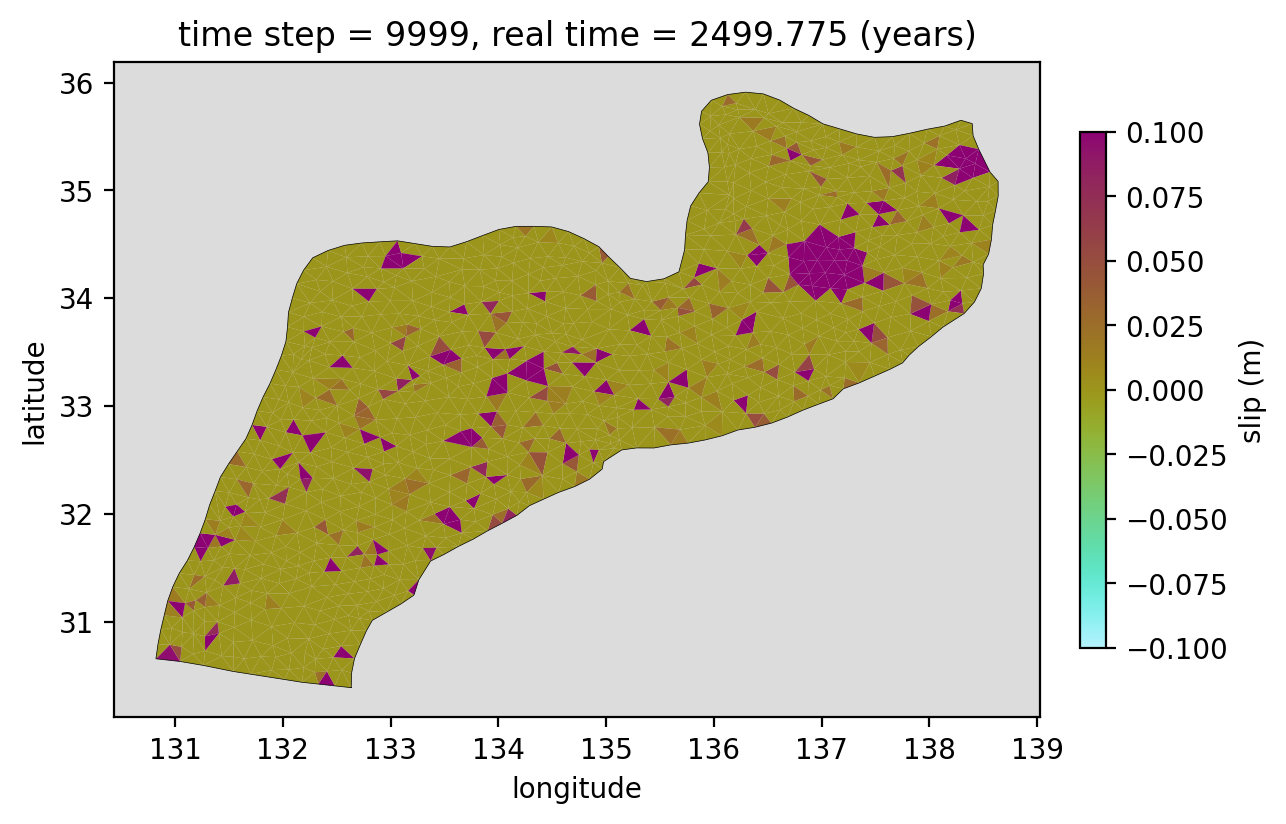

In [10]:
# fig, ax = plt.subplots()
# x = np.linspace(-3, 3, 91)
# t = np.linspace(0, 25, 30)
# y = np.linspace(-3, 3, 91)
# X3, Y3, T3 = np.meshgrid(x, y, t)
# sinT3 = np.sin(2 * np.pi * T3 / T3.max(axis=2)[..., np.newaxis])
# G = (X3**2 + Y3**2) * sinT3
# cax = ax.pcolormesh(x, y, G[:-1, :-1, 0], vmin=-1, vmax=1, cmap="Blues")
# fig.colorbar(cax)


# import numpy as np
from matplotlib import pyplot as plt, animation

fig, ax = plt.subplots()
to_plot = cumulative_slip[0, :]
pc = plot_meshes(mesh[0], to_plot, plt.gca(), cmc.hawaii_r)
plt.colorbar(pc, fraction=0.026, pad=0.04, label="slip (m)")
# pc.set_clim(-1e0, 1e0)
plt.plot(mesh[0].x_perimeter, mesh[0].y_perimeter, "-k", linewidth=0.25)
plt.gca().set_facecolor("gainsboro")
plt.xlabel("longitude")
plt.ylabel("latitude")


def animate(i):
    pc.set_array(cumulative_slip[i, :])
    plt.title(f"time step = {i}, real time = {time_series.real_time[i]:0.3f} (years)")


anim = animation.FuncAnimation(fig, animate, interval=2, frames=10000)
anim.save(filename="nankai.mp4", writer="ffmpeg", dpi=100)
plt.show()

In [14]:
from IPython.display import Video

Video("nankai.mp4", width=500, height=500)